In [4]:
# Import libraries 

# Data manipulation
import pandas as pd

# Numerical operations
import numpy as np
import scipy as sp
import scipy.stats as st

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistics
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

In [5]:
# Confirm directory 'Figures'

import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

In [6]:
# Read the data

earthquake_df = pd.read_csv('earthquakes_US_14Jul−13Aug_2018.csv') 
earthquake_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-08-13T20:32:00.830Z,33.860333,-117.501167,1.50,1.56,ml,29.0,44.0,0.06337,0.2600,...,2018-08-13T20:35:51.429Z,"3km SE of Home Gardens, CA",quarry blast,0.38,0.71,0.213,37.0,automatic,ci,ci
1,2018-08-13T20:15:08.350Z,33.523667,-116.747333,3.69,0.40,ml,14.0,90.0,0.04246,0.0800,...,2018-08-13T20:18:36.325Z,"8km WSW of Anza, CA",earthquake,0.18,0.42,0.137,9.0,automatic,ci,ci
2,2018-08-13T20:11:13.973Z,40.601000,-115.955500,0.00,2.20,ml,12.0,108.3,0.43800,0.1944,...,2018-08-13T20:28:20.650Z,"17km SE of Carlin, Nevada",explosion,NaN,0.00,0.080,8.0,reviewed,nn,nn
3,2018-08-13T20:09:39.080Z,33.482333,-116.744333,7.91,0.34,ml,18.0,65.0,0.06527,0.1800,...,2018-08-13T20:13:23.288Z,"10km SW of Anza, CA",earthquake,0.35,0.86,0.093,8.0,automatic,ci,ci
4,2018-08-13T19:59:26.490Z,33.491167,-116.795500,2.54,0.39,ml,11.0,109.0,0.08857,0.0800,...,2018-08-13T20:02:57.234Z,"8km NE of Aguanga, CA",earthquake,0.26,0.37,0.055,8.0,automatic,ci,ci


In [20]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5392 non-null   object 
 1   latitude         5392 non-null   float64
 2   longitude        5392 non-null   float64
 3   depth            5392 non-null   float64
 4   mag              5392 non-null   float64
 5   magType          5392 non-null   object 
 6   nst              5273 non-null   float64
 7   gap              5392 non-null   float64
 8   dmin             5354 non-null   float64
 9   rms              5392 non-null   float64
 10  net              5392 non-null   object 
 11  id               5392 non-null   object 
 12  updated          5392 non-null   object 
 13  place            5392 non-null   object 
 14  type             5392 non-null   object 
 15  horizontalError  4468 non-null   float64
 16  depthError       5392 non-null   float64
 17  magError      

In [21]:
# Summary of numerical statistics

earthquake_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5392.000000,5392.000000,5392.000000,5392.000000,5273.000000,5392.000000,5354.000000,5392.000000,4468.000000,5392.000000,5244.000000,5351.000000
mean,37.606000,-117.569722,6.359622,0.955510,19.512042,111.331116,0.084552,0.125773,0.504946,2.677869,0.191992,13.081854
std,3.749685,5.283974,4.987960,0.632717,15.489898,58.750174,0.118560,0.098380,0.728227,6.382494,0.122044,16.614396
min,29.032600,-124.951000,-3.390000,0.000000,0.000000,11.000000,0.000193,0.000000,0.090000,0.000000,0.000000,0.000000
25%,34.039958,-119.914650,2.540000,0.500000,9.000000,69.000000,0.016730,0.050000,0.230000,0.440000,0.116000,5.000000
50%,37.614333,-118.541100,5.380000,0.830000,15.000000,100.000000,0.042225,0.120000,0.350000,0.710000,0.167000,9.000000
75%,38.812208,-116.747667,9.062500,1.290000,24.000000,142.000000,0.103800,0.170000,0.530000,1.580000,0.240000,16.000000
max,49.494167,-65.942300,51.680000,4.800000,249.000000,345.000000,1.383000,1.270000,22.330000,87.410000,1.570000,288.000000


In [22]:
# Missing data

earthquake_df.isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                119
gap                  0
dmin                38
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    924
depthError           0
magError           148
magNst              41
status               0
locationSource       0
magSource            0
dtype: int64

In [ ]:
# Handling missing data using dropping and imputation methods 
# Dropping column 'horizontalError' 

earthquake_df.drop(columns=['horizontalError'], inplace=True)

In [26]:
# Mean and median imputation

earthquake_df['magError'].fillna(earthquake_df['magError'].mean(), inplace=True)
earthquake_df['magNst'].fillna(earthquake_df['magNst'].median(), inplace=True)

In [27]:
earthquake_df['nst'].fillna(earthquake_df['nst'].mean(), inplace=True)
earthquake_df['dmin'].fillna(earthquake_df['dmin'].mean(), inplace=True)

In [28]:
# Final check

earthquake_df.isnull().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
nst               0
gap               0
dmin              0
rms               0
net               0
id                0
updated           0
place             0
type              0
depthError        0
magError          0
magNst            0
status            0
locationSource    0
magSource         0
dtype: int64

In [29]:
# Verify cleaned data

earthquake_df.info()
earthquake_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            5392 non-null   object 
 1   latitude        5392 non-null   float64
 2   longitude       5392 non-null   float64
 3   depth           5392 non-null   float64
 4   mag             5392 non-null   float64
 5   magType         5392 non-null   object 
 6   nst             5392 non-null   float64
 7   gap             5392 non-null   float64
 8   dmin            5392 non-null   float64
 9   rms             5392 non-null   float64
 10  net             5392 non-null   object 
 11  id              5392 non-null   object 
 12  updated         5392 non-null   object 
 13  place           5392 non-null   object 
 14  type            5392 non-null   object 
 15  depthError      5392 non-null   float64
 16  magError        5392 non-null   float64
 17  magNst          5392 non-null   f

,latitude,longitude,depth,mag,nst,gap,dmin,rms,depthError,magError,magNst
count,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000
mean,37.606000,-117.569722,6.359622,0.955510,19.512042,111.331116,0.084552,0.125773,2.677869,0.191992,13.050816
std,3.749685,5.283974,4.987960,0.632717,15.317983,58.750174,0.118142,0.098380,6.382494,0.120357,16.554896
min,29.032600,-124.951000,-3.390000,0.000000,0.000000,11.000000,0.000193,0.000000,0.000000,0.000000,0.000000
25%,34.039958,-119.914650,2.540000,0.500000,9.000000,69.000000,0.016958,0.050000,0.440000,0.117000,5.000000
50%,37.614333,-118.541100,5.380000,0.830000,15.500000,100.000000,0.042745,0.120000,0.710000,0.170000,9.000000
75%,38.812208,-116.747667,9.062500,1.290000,24.000000,142.000000,0.103200,0.170000,1.580000,0.240000,16.000000
max,49.494167,-65.942300,51.680000,4.800000,249.000000,345.000000,1.383000,1.270000,87.410000,1.570000,288.000000


In [30]:
#Univariate dataset of the magnitudes

magnitudes = earthquake_df.mag

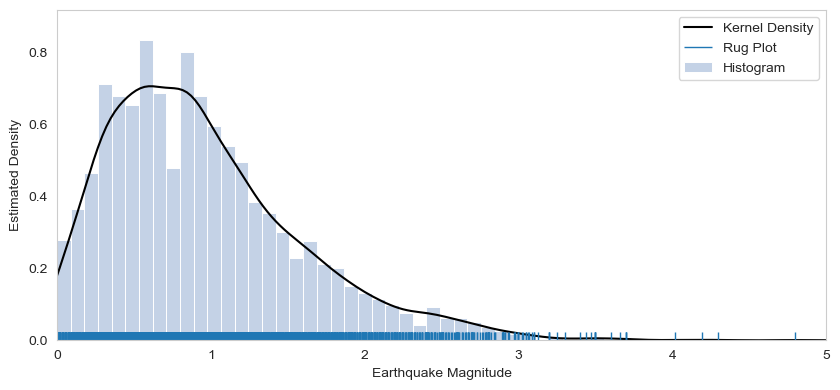

In [36]:
# Setting plot dimensions
widthInInches = 8.5
heightInInches = 4
plt.figure( figsize=(widthInInches, heightInInches) )

kdeAxes = sns.kdeplot( magnitudes, color="black", label="Kernel Density")
sns.histplot( magnitudes, stat="density", color = "lightsteelblue", label="Histogram"  )

# Rug plot
sns.rugplot( magnitudes, label="Rug Plot" )

# Labels
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Estimated Density')

# Tick marks & axes limit
plt.xticks((0,1,2,3,4,5))
plt.xlim([0,5])
plt.legend()
plt.tight_layout()

plt.savefig('Figures/earth_distplot.pdf')
plt.show()

In [38]:
meanMagnitude = np.mean(magnitudes)
medianMagnitude = np.median(magnitudes)
varianceMagnitude = np.var(magnitudes, ddof=1)  # Sample variance
print(f"Mean: {meanMagnitude}, Median: {medianMagnitude}, Variance: {varianceMagnitude}")

Mean: 0.9555100148367957, Median: 0.83, Variance: 0.4003312924242657


In [39]:
# Measures of central tendency 

meanMagnitude = np.mean(magnitudes)
medianMagnitude = np.median(magnitudes)

kdeX, kdeY = kdeAxes.get_lines()[0].get_data()
kdeYLimits = kdeAxes.get_ylim()
kdeYMax = kdeYLimits[1]
posOfMax = 0 
maxSoFar = kdeY[0] 
for j in range(len(kdeY)):
    if( kdeY[j] > maxSoFar ):
        posOfMax = j
        maxSoFar = kdeY[j]
        
magnitudeMode = kdeX[posOfMax]

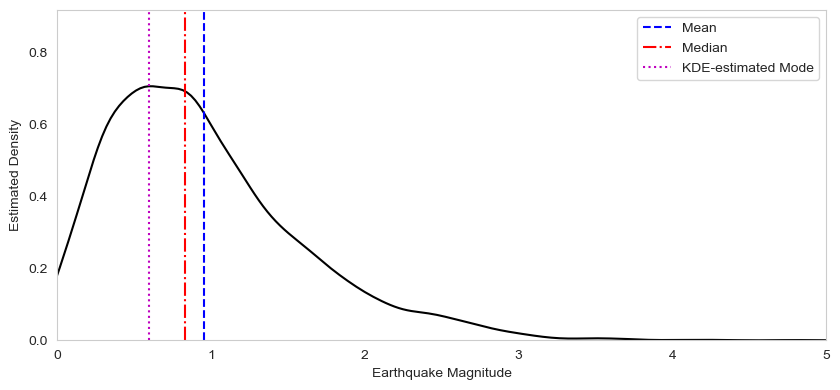

In [40]:
# Plot dimensions
plt.figure( figsize=(widthInInches, heightInInches) )

# Kernel density estimate curve
plt.plot(kdeX, kdeY, '-k')

xx = np.ones(2)
yy = np.array([0, kdeYMax])

# Vertical lines for the measures of central tendency

plt.plot( meanMagnitude*xx, yy,'--b',label='Mean')
plt.plot( medianMagnitude*xx, yy,'-.r',label='Median')
plt.plot( magnitudeMode*xx, yy,':m',label='KDE-estimated Mode')

# Labels & tick marks
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Estimated Density')
plt.ylim(kdeYLimits)
plt.xlim([0,5])
plt.xticks((0,1,2,3,4,5))

plt.legend()
plt.tight_layout()

plt.savefig('Figures/earth_central.pdf')
plt.show()

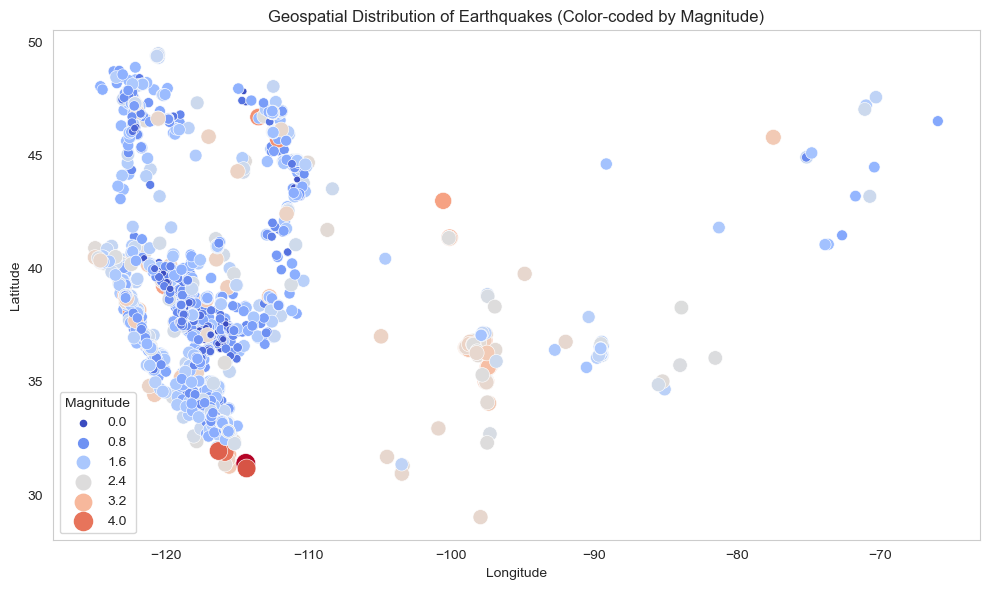

In [44]:
# Geospatial Analysis
# Create scatter plot of earthquakes by latitude and longitude
# Color-coded by magnitude (mag)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag', 
                sizes=(20, 200), palette='coolwarm', data=earthquake_df, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Earthquakes (Color-coded by Magnitude)')

plt.legend(title="Magnitude")
plt.tight_layout()

plt.savefig('Figures/geospatial_distribution.pdf')
plt.show()